Root Mean Squared Error: 824.0525421512498


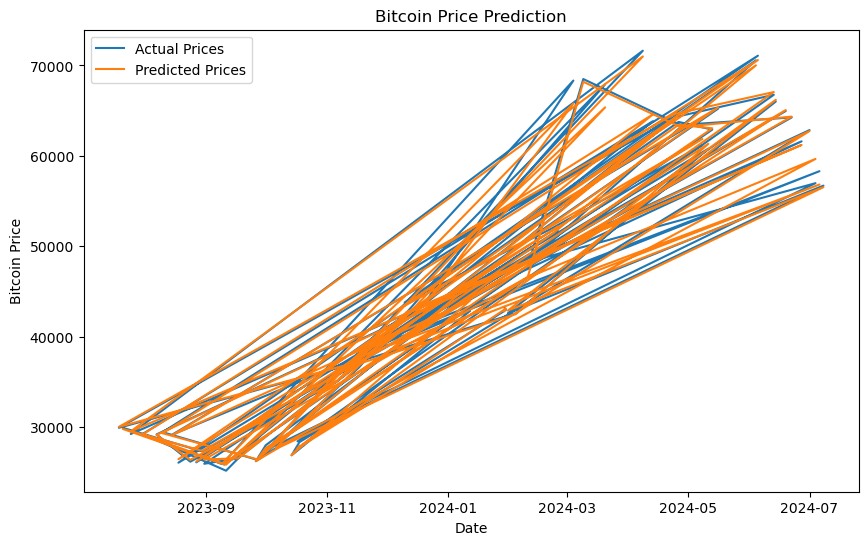

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Load the dataset
# Assuming the dataset is a CSV file named 'bitcoin_price.csv'
# The dataset should contain at least the columns 'Date' and 'Close'
data = pd.read_csv('bitcoin_price.csv')

# Preprocessing
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Feature Engineering
data['Day'] = data.index.day
data['Month'] = data.index.month
data['Year'] = data.index.year
data['DayOfWeek'] = data.index.dayofweek
data['Quarter'] = data.index.quarter

# Create lag features
for lag in range(1, 8):
    data[f'Lag_{lag}'] = data['Close'].shift(lag)

data.dropna(inplace=True)

# Split the data into features and target
X = data.drop(columns=['Close'])
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train, y_train)

# Model Prediction
y_pred = xg_reg.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()